In [1]:
import os 
import itertools
import pickle
import pandas as pd

In [2]:
data = [pickle.load(open(os.path.join("../dataresults",f), "rb")) for f in os.listdir("../dataresults/")]

make dataframe

In [3]:
books = ["MG", "DK", "FD", "CS", "PB", "WY", "BR"]
col_headers = ["date", "home", "away", "SCOREh", "SCOREa"] + list(itertools.chain(*[[b+"h", b+"a"] for b in books]))
all_rows = []
for data_i in data:
    dt, teams, results, odds = data_i
    n_games = len(teams)
    rows = [[dt] for _ in range(n_games)]
    for j in range(n_games): 
        rows[j].extend(teams[j])
        rows[j].extend(results[j])
        for b in books: 
            rows[j].extend(odds[j][b])
    all_rows.extend(rows)
games_data = pd.DataFrame(all_rows, columns=col_headers)

In [4]:
def calc_payout(row, col): 
    if row[col] < 0: 
        return 100
    return abs(row[col])

def calc_cost(row, col): 
    if row[col] < 0: 
        return abs(row[col])
    return 100

def calc_rawimplodds(row, col):
    payout = calc_payout(row, col)
    cost = calc_cost(row, col)
    return cost/(payout+cost)

In [5]:
for book in books:
    for leg in ["h","a"]:
        games_data[book+leg+"_rawio"] = games_data.apply(lambda r: calc_rawimplodds(r, book+leg), axis=1)
    games_data[book+"_rawiosum"] = sum(games_data[book+leg+"_rawio"] for leg in ["h","a"])
    games_data[book+"_vig"] = games_data[book+"_rawiosum"] - 1
    for leg in ["h","a"]:
        games_data[book+leg+"_io"] = games_data[book+leg+"_rawio"] - games_data[book+"_vig"]/2

In [6]:
games_data

,date,home,away,SCOREh,SCOREa,MGh,MGa,DKh,DKa,FDh,...,WY_rawiosum,WY_vig,WYh_io,WYa_io,BRh_rawio,BRa_rawio,BR_rawiosum,BR_vig,BRh_io,BRa_io
0,2018-01-01,Milwaukee,Toronto,127,131,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-01-01,Orlando,Brooklyn,95,98,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-01-01,L.A. Lakers,Minnesota,96,114,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-01-01,Portland,Chicago,124,120,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-01-02,Portland,Cleveland,110,127,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7024,2023-02-15,Dallas,Denver,109,118,190.0,-250.0,185.0,-215.0,215.0,...,1.048285,0.048285,0.314840,0.685160,0.350877,0.701493,1.052370,0.052370,0.324692,0.675308
7025,2023-02-15,New Orleans,L.A. Lakers,102,120,150.0,-185.0,160.0,-190.0,166.0,...,1.044148,0.044148,0.341563,0.658437,0.400000,0.650350,1.050350,0.050350,0.374825,0.625175
7026,2023-02-16,Milwaukee,Chicago,112,100,-350.0,260.0,-330.0,275.0,-335.0,...,1.049254,0.049254,0.750654,0.249346,0.770115,0.273973,1.044088,0.044088,0.748071,0.251929
7027,2023-02-16,Washington,Minnesota,114,106,140.0,-165.0,145.0,-170.0,134.0,...,1.037879,0.037879,0.397727,0.602273,0.434783,0.613900,1.048682,0.048682,0.410441,0.589559


In [7]:
games_data[["date"] + list(itertools.chain(*[[book+"_vig", book+"h"+"_io"] for book in books]))]

,date,MG_vig,MGh_io,DK_vig,DKh_io,FD_vig,FDh_io,CS_vig,CSh_io,PB_vig,PBh_io,WY_vig,WYh_io,BR_vig,BRh_io
0,2018-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7024,2023-02-15,0.059113,0.315271,0.033417,0.334169,0.035770,0.299575,0.045067,0.328344,0.043185,0.329285,0.048285,0.314840,0.052370,0.324692
7025,2023-02-15,0.049123,0.375439,0.039788,0.364721,0.040369,0.355755,0.041423,0.349659,0.044025,0.355346,0.044148,0.341563,0.050350,0.374825
7026,2023-02-16,0.055556,0.750000,0.034109,0.750388,0.040385,0.749922,0.046831,0.745638,0.050420,0.739496,0.049254,0.750654,0.044088,0.748071
7027,2023-02-16,0.039308,0.397013,0.037793,0.389267,0.039754,0.407474,0.042390,0.404337,0.040917,0.405074,0.037879,0.397727,0.048682,0.410441


<AxesSubplot:title={'center':'FD vigs'}, xlabel='date', ylabel='FD_vig'>

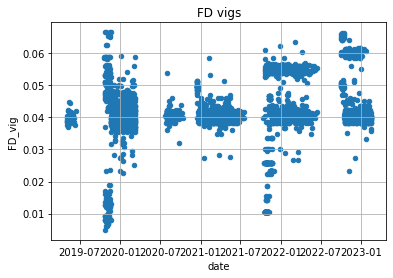

In [8]:
book = "FD"
games_data[["date", book+"_vig"]].plot.scatter("date",book+"_vig",grid=True,title=f"{book} vigs")

there does not seem to be a relationship between extremity of odds and vig for FD

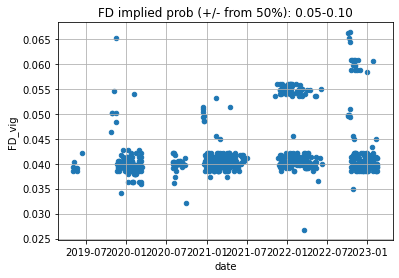

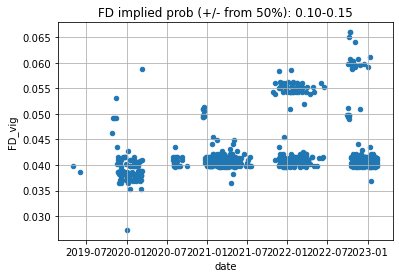

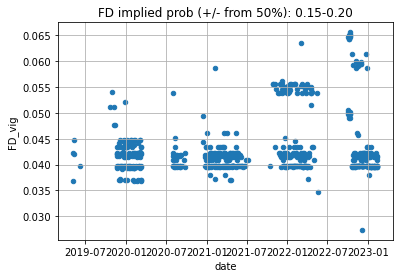

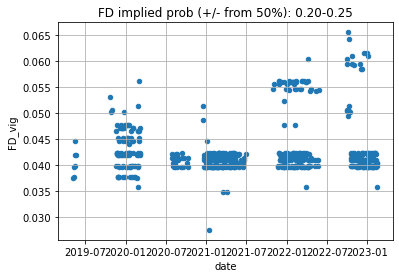

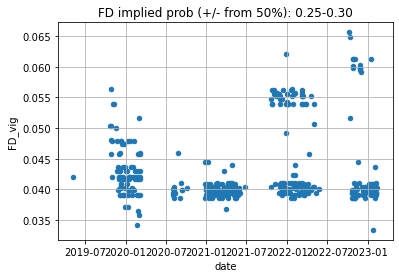

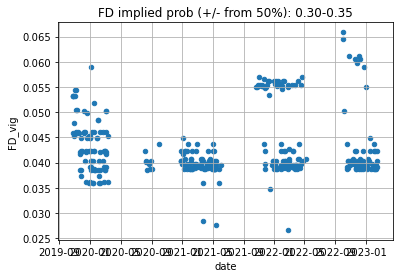

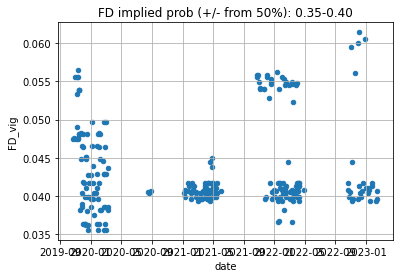

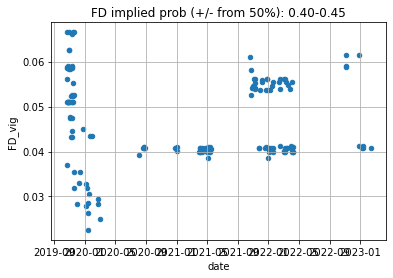

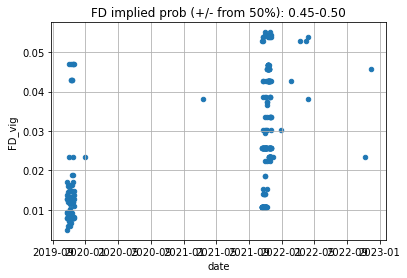

In [9]:
book = "FD"
bsize = 0.05
for b in [bsize*i for i in range(1,int(0.5//bsize)+1)]:
    games_data[(games_data[book+"h_io"]-0.5).abs().between(b,b+bsize)]\
    .plot.scatter("date",book+"_vig",grid=True,title=f"{book} implied prob (+/- from 50%): {b:.2f}-{b+bsize:.2f}")

In [10]:
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

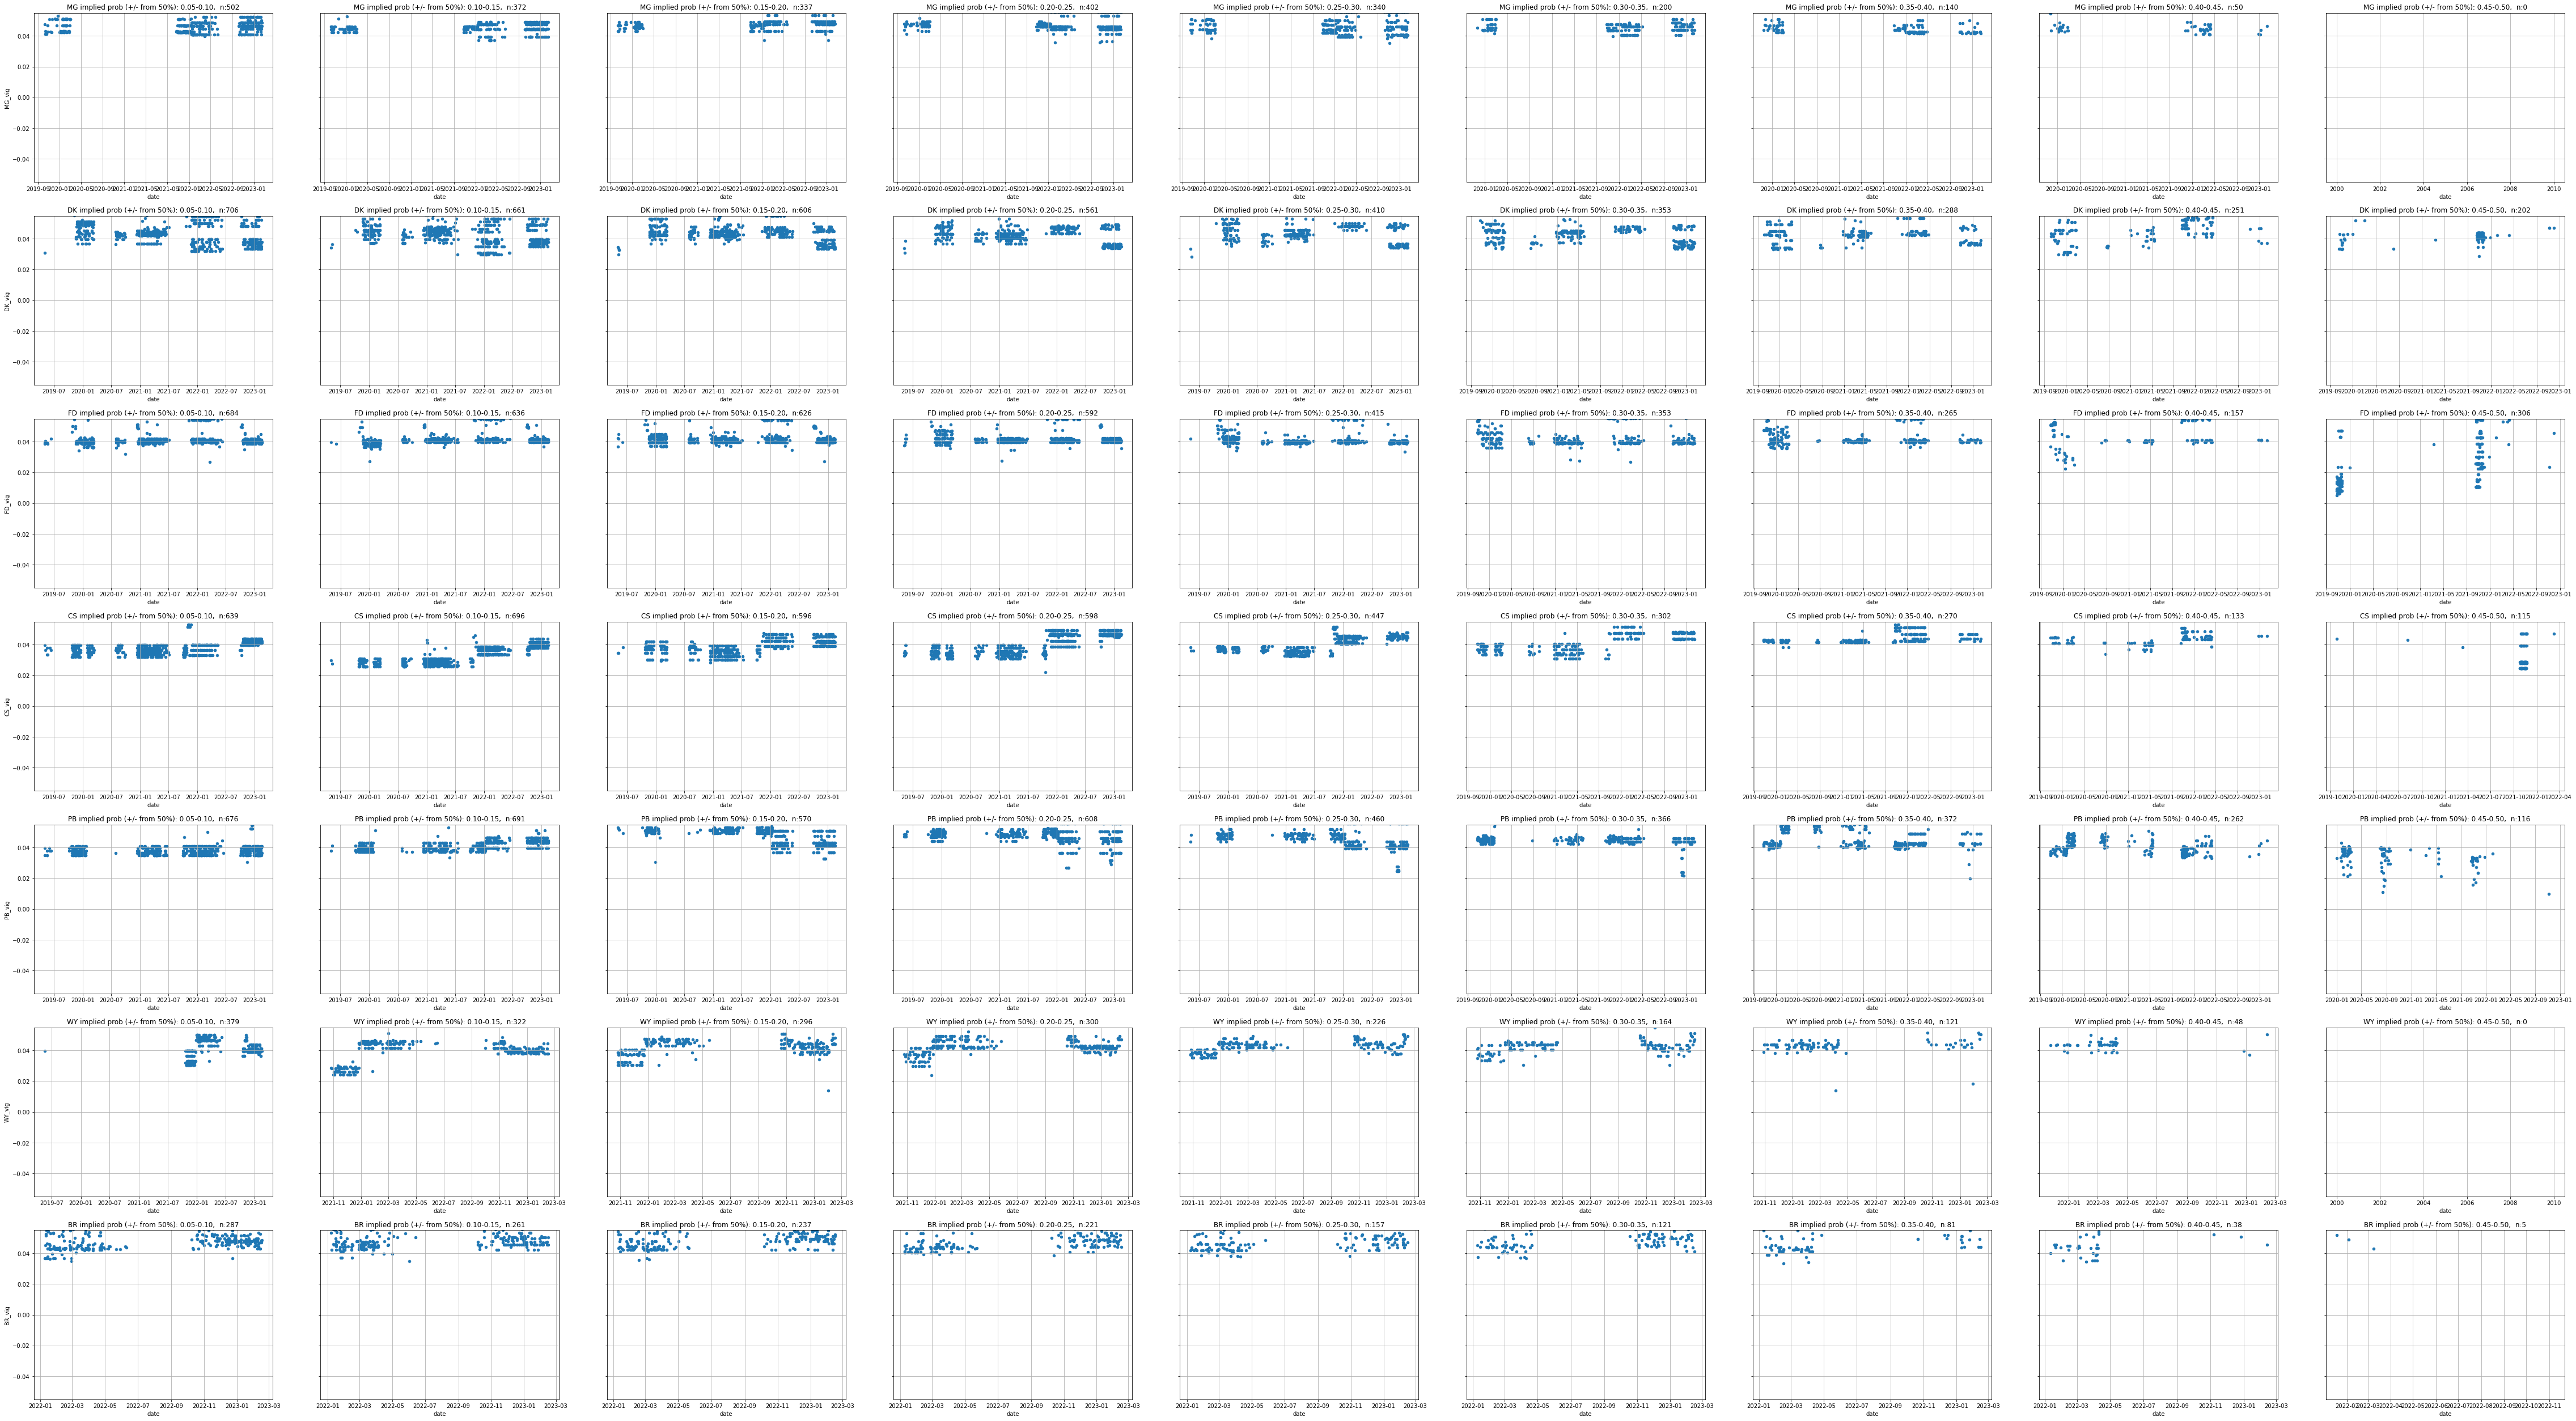

In [16]:
resultspdf = PdfPages("../results/vigs_implodds.pdf")

bsize = 0.05
bins = [bsize*i for i in range(1,int(0.5//bsize)+1)]    
fig, axes = plt.subplots(nrows=len(books), ncols=len(bins), sharey=True, figsize=(80, 45))

for i,book in enumerate(books): 
    for j,b in enumerate(bins):
        filt_games_data = games_data[(games_data[book+"h_io"]-0.5).abs().between(b,b+bsize)]
        n_samples = len(filt_games_data)
        filt_games_data.plot.scatter(
            "date",book+"_vig",
            ax=axes[i,j],
            grid=True,
            title=f"{book} implied prob (+/- from 50%): {b:.2f}-{b+bsize:.2f},  n:{n_samples}")
plt.savefig(resultspdf, format='pdf') #, bbox_inches='tight')
resultspdf.close()
        

In [131]:
games_data

,date,home,away,SCOREh,SCOREa,MGh,MGa,DKh,DKa,FDh,...,WY_rawiosum,WY_vig,WYh_io,WYa_io,BRh_rawio,BRa_rawio,BR_rawiosum,BR_vig,BRh_io,BRa_io
0,2018-01-01,Milwaukee,Toronto,127,131,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-01-01,Orlando,Brooklyn,95,98,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-01-01,L.A. Lakers,Minnesota,96,114,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-01-01,Portland,Chicago,124,120,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-01-02,Portland,Cleveland,110,127,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7024,2023-02-15,Dallas,Denver,109,118,190.0,-250.0,185.0,-215.0,215.0,...,1.048285,0.048285,0.314840,0.685160,0.350877,0.701493,1.052370,0.052370,0.324692,0.675308
7025,2023-02-15,New Orleans,L.A. Lakers,102,120,150.0,-185.0,160.0,-190.0,166.0,...,1.044148,0.044148,0.341563,0.658437,0.400000,0.650350,1.050350,0.050350,0.374825,0.625175
7026,2023-02-16,Milwaukee,Chicago,112,100,-350.0,260.0,-330.0,275.0,-335.0,...,1.049254,0.049254,0.750654,0.249346,0.770115,0.273973,1.044088,0.044088,0.748071,0.251929
7027,2023-02-16,Washington,Minnesota,114,106,140.0,-165.0,145.0,-170.0,134.0,...,1.037879,0.037879,0.397727,0.602273,0.434783,0.613900,1.048682,0.048682,0.410441,0.589559


In [ ]:
bsize = 0.05
for b in [bsize*i for i in range(1,int(0.5//bsize)+1)]:
    filt_games_data = games_data[(games_data[book+"h_io"]-0.5).abs().between(b,b+bsize)]
    n_samples = len(filt_games_data)
    filt_games_data.plot.scatter(
        "date",book+"_vig",
        grid=True,
        title=f"{book} implied prob (+/- from 50%): {b:.2f}-{b+bsize:.2f},  n:{n_samples}")

In [85]:
cf.help()

Use 'cufflinks.help(figure)' to see the list of available parameters for the given figure.
Use 'DataFrame.iplot(kind=figure)' to plot the respective figure
Figures:
	bar
	box
	bubble
	bubble3d
	candle
	choroplet
	distplot
	heatmap
	histogram
	ohlc
	pie
	ratio
	scatter
	scatter3d
	scattergeo
	spread
	surface
	violin


In [116]:
games_data[[book+"_vig"]].iplot(kind='histogram')

In [ ]:
import cufflinks as cf
# Going offline means you plot only locally, and dont need a plotly username / password
cf.go_offline()

In [114]:
cf.set_config_file(dimensions=(500,300), margin=(4,4,4,4))

In [119]:
bsize = 0.05
for b in [bsize*i for i in range(1,int(0.5//bsize)+1)]:
    games_data[(games_data[book+"h_io"]-0.5).abs().between(b,b+bsize)].set_index("date")[[book+"_vig"]].iplot(
        size=4,mode='markers',kind="scatter")

In [204]:
games_data = games_data.loc[:,
    ["date", "home", "away", "SCOREh", "SCOREa", "DKh", "DKa"]
]

simple calcs

In [205]:
def calc_payout_from_moneyline(row, col): 
    if row[col] < 0: 
        return 100
    return abs(row[col])

def calc_cost_from_moneyline(row, col): 
    if row[col] < 0: 
        return abs(row[col])
    return 100

def calc_implprob_from_moneyline(row, col):
    payout = calc_payout_from_moneyline(row, col)
    cost = calc_cost_from_moneyline(row, col)
    return cost/(payout+cost)
    
games_data["DKh_payout"] = games_data.apply(lambda r: calc_payout_from_moneyline(r, "DKh"), axis=1)
games_data["DKa_payout"] = games_data.apply(lambda r: calc_payout_from_moneyline(r, "DKa"), axis=1)
games_data["DKh_cost"] = games_data.apply(lambda r: calc_cost_from_moneyline(r, "DKh"), axis=1)
games_data["DKa_cost"] = games_data.apply(lambda r: calc_cost_from_moneyline(r, "DKa"), axis=1)
games_data["DKh_impliedprob"] = games_data.apply(lambda r: calc_implprob_from_moneyline(r, "DKh"), axis=1)
games_data["DKa_impliedprob"] = games_data.apply(lambda r: calc_implprob_from_moneyline(r, "DKa"), axis=1)
games_data["RESh"] = (games_data["SCOREh"] > games_data["SCOREa"]).astype(int)
games_data["RESa"] = (games_data["SCOREa"] > games_data["SCOREh"]).astype(int)

In [206]:
games_data[
    ["date", "home", "away", "SCOREh", "SCOREa", "DKh", "DKa", 
    "DKh_payout", "DKa_payout", "DKh_cost", "DKa_cost", 
     "DKh_impliedprob", "DKa_impliedprob", "RESh", "RESa"]
]

,date,home,away,SCOREh,SCOREa,DKh,DKa,DKh_payout,DKa_payout,DKh_cost,DKa_cost,DKh_impliedprob,DKa_impliedprob,RESh,RESa
0,2018-01-01,Milwaukee,Toronto,127,131,NaN,NaN,NaN,NaN,100.0,100.0,NaN,NaN,0,1
1,2018-01-01,Orlando,Brooklyn,95,98,NaN,NaN,NaN,NaN,100.0,100.0,NaN,NaN,0,1
2,2018-01-01,L.A. Lakers,Minnesota,96,114,NaN,NaN,NaN,NaN,100.0,100.0,NaN,NaN,0,1
3,2018-01-01,Portland,Chicago,124,120,NaN,NaN,NaN,NaN,100.0,100.0,NaN,NaN,1,0
4,2018-01-02,Portland,Cleveland,110,127,NaN,NaN,NaN,NaN,100.0,100.0,NaN,NaN,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7024,2023-02-15,Dallas,Denver,109,118,185.0,-215.0,185.0,100.0,100.0,215.0,0.350877,0.682540,0,1
7025,2023-02-15,New Orleans,L.A. Lakers,102,120,160.0,-190.0,160.0,100.0,100.0,190.0,0.384615,0.655172,0,1
7026,2023-02-16,Milwaukee,Chicago,112,100,-330.0,275.0,100.0,275.0,330.0,100.0,0.767442,0.266667,1,0
7027,2023-02-16,Washington,Minnesota,114,106,145.0,-170.0,145.0,100.0,100.0,170.0,0.408163,0.629630,1,0


simple signals

In [207]:
def signal_1(row): 
    # what if we always bet favorites? 
    raw = row["DKh_impliedprob"] > row["DKa_impliedprob"]
    return raw

games_data["DKh_sig0"] = ((games_data["DKh_impliedprob"] > games_data["DKa_impliedprob"])).astype(int)

games_data["DKh_sig1"] = ((games_data["DKh_impliedprob"] > games_data["DKa_impliedprob"]) & \
                          (games_data["DKh_impliedprob"].between(0.9,1.0))
                         ).astype(int)
games_data["DKa_sig1"] = ((games_data["DKa_impliedprob"] > games_data["DKh_impliedprob"]) & \
                          True
#                           (games_data["DKa_impliedprob"].between(0.9,1.0))
                         ).astype(int)

In [208]:
games_data[["DKh_sig1", "DKa_sig1"]].describe()

,DKh_sig1,DKa_sig1
count,7029.000000,7029.000000
mean,0.029023,0.410585
std,0.167882,0.491975
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,1.000000
max,1.000000,1.000000


In [209]:
games_data["DKh_sig1_pnl"] = games_data["DKh_sig1"]*\
    ((games_data["DKh_payout"]/games_data["DKh_cost"])*games_data["RESh"] - 1*games_data["RESa"])
games_data["DKa_sig1_pnl"] = games_data["DKa_sig1"]*\
    ((games_data["DKa_payout"]/games_data["DKa_cost"])*games_data["RESa"] - 1*games_data["RESh"])

In [210]:
games_data

,date,home,away,SCOREh,SCOREa,DKh,DKa,DKh_payout,DKa_payout,DKh_cost,DKa_cost,DKh_impliedprob,DKa_impliedprob,RESh,RESa,DKh_sig0,DKh_sig1,DKa_sig1,DKh_sig1_pnl,DKa_sig1_pnl
0,2018-01-01,Milwaukee,Toronto,127,131,NaN,NaN,NaN,NaN,100.0,100.0,NaN,NaN,0,1,0,0,0,NaN,NaN
1,2018-01-01,Orlando,Brooklyn,95,98,NaN,NaN,NaN,NaN,100.0,100.0,NaN,NaN,0,1,0,0,0,NaN,NaN
2,2018-01-01,L.A. Lakers,Minnesota,96,114,NaN,NaN,NaN,NaN,100.0,100.0,NaN,NaN,0,1,0,0,0,NaN,NaN
3,2018-01-01,Portland,Chicago,124,120,NaN,NaN,NaN,NaN,100.0,100.0,NaN,NaN,1,0,0,0,0,NaN,NaN
4,2018-01-02,Portland,Cleveland,110,127,NaN,NaN,NaN,NaN,100.0,100.0,NaN,NaN,0,1,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7024,2023-02-15,Dallas,Denver,109,118,185.0,-215.0,185.0,100.0,100.0,215.0,0.350877,0.682540,0,1,0,0,1,-0.0,0.465116
7025,2023-02-15,New Orleans,L.A. Lakers,102,120,160.0,-190.0,160.0,100.0,100.0,190.0,0.384615,0.655172,0,1,0,0,1,-0.0,0.526316
7026,2023-02-16,Milwaukee,Chicago,112,100,-330.0,275.0,100.0,275.0,330.0,100.0,0.767442,0.266667,1,0,1,0,0,0.0,-0.000000
7027,2023-02-16,Washington,Minnesota,114,106,145.0,-170.0,145.0,100.0,100.0,170.0,0.408163,0.629630,1,0,0,0,1,0.0,-1.000000


<AxesSubplot:xlabel='date'>

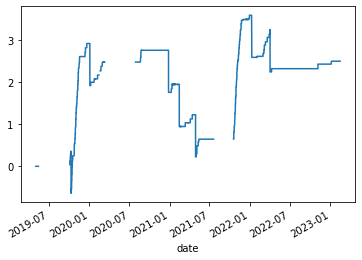

In [211]:
games_data.set_index("date")["DKh_sig1_pnl"].cumsum().plot()

<AxesSubplot:xlabel='date'>

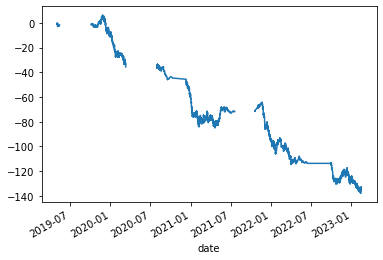

In [227]:
games_data.set_index("date")["DKa_sig1_pnl"].cumsum().plot()

<AxesSubplot:>

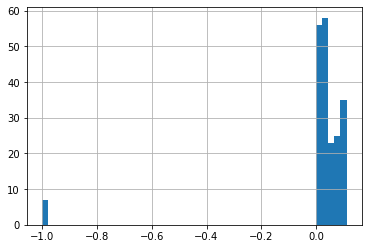

In [212]:
pnl = games_data["DKh_sig1_pnl"]
pnl[pnl!=0].hist(bins=50)

In [213]:
bins = [0.05*i for i in range(1, 21)]
games_data["DKh_ipb"] = pd.cut(games_data.DKh_impliedprob, bins)
games_data.groupby("DKh_ipb").agg("mean")
games_data.groupby("DKh_ipb").agg("sum")

,SCOREh,SCOREa,DKh,DKa,DKh_payout,DKa_payout,DKh_cost,DKa_cost,DKh_impliedprob,DKa_impliedprob,RESh,RESa,DKh_sig0,DKh_sig1,DKa_sig1,DKh_sig1_pnl,DKa_sig1_pnl
DKh_ipb,,,,,,,,,,,,,,,,,
"(0.05, 0.1]",21018,24389,260900.0,-819465.0,260900.0,20800.0,20800.0,819465.0,15.841310,201.859177,4,204,0,0,208,0.000000,2.194791
"(0.1, 0.15]",19960,22480,132450.0,-229208.0,132450.0,19100.0,19100.0,229208.0,24.384491,175.548000,19,170,0,0,191,0.000000,-4.113076
"(0.15, 0.2]",25607,28067,114000.0,-165510.0,114000.0,24000.0,24000.0,165510.0,42.048228,208.953246,44,196,0,0,240,0.000000,-14.919821
"(0.2, 0.25]",28195,30735,89870.0,-120825.0,89870.0,26300.0,26300.0,120825.0,59.804703,215.553317,60,202,0,0,263,0.000000,-15.249997
"(0.25, 0.3]",35670,37653,85435.0,-109256.0,85435.0,32500.0,32500.0,109256.0,89.801790,250.093742,102,222,0,0,325,0.000000,-35.415510
"(0.3, 0.35]",39597,42005,76164.0,-94792.0,76164.0,36600.0,36600.0,94792.0,118.997505,263.759455,108,256,0,0,366,0.000000,-8.558753
"(0.35, 0.4]",47168,49334,72455.0,-88147.0,72455.0,43600.0,43600.0,88147.0,164.079198,291.278775,141,292,0,0,436,0.000000,4.520256
"(0.4, 0.45]",37903,38798,46535.0,-55895.0,46535.0,34500.0,34500.0,55895.0,147.044661,213.085507,143,200,0,0,345,0.000000,-19.191895
"(0.45, 0.5]",44987,45394,44540.0,-54008.0,44540.0,40700.0,40700.0,54008.0,194.538285,231.847611,191,212,0,0,407,0.000000,-30.130677


In [214]:
bins = [0.05*i for i in range(1, 21)]
games_data["DKa_ipb"] = pd.cut(games_data.DKa_impliedprob, bins)
games_data.groupby("DKa_ipb").agg("sum")

,SCOREh,SCOREa,DKh,DKa,DKh_payout,DKa_payout,DKh_cost,DKa_cost,DKh_impliedprob,DKa_impliedprob,RESh,RESa,DKh_sig0,DKh_sig1,DKa_sig1,DKh_sig1_pnl,DKa_sig1_pnl
DKa_ipb,,,,,,,,,,,,,,,,,
"(0.05, 0.1]",13313,11574,-502584.0,147300.0,11500.0,147300.0,502584.0,11500.0,112.041047,8.522324,115,0,115,115,0,3.047981,0.000000
"(0.1, 0.15]",9565,8780,-108276.0,57400.0,8200.0,57400.0,108276.0,8200.0,75.817777,10.358103,74,8,82,78,0,-1.353343,0.000000
"(0.15, 0.2]",9608,8713,-55265.0,37590.0,8100.0,37590.0,55265.0,8100.0,70.418218,14.458459,68,13,81,7,0,0.754714,0.000000
"(0.2, 0.25]",13967,12566,-56985.0,41925.0,12100.0,41925.0,56985.0,12100.0,99.623435,27.205041,98,19,121,0,0,0.000000,0.000000
"(0.25, 0.3]",19873,18694,-57694.0,45185.0,17200.0,45185.0,57694.0,17200.0,132.273760,47.559432,122,50,172,0,0,0.000000,0.000000
"(0.3, 0.35]",24595,23573,-55649.0,44677.0,21500.0,44677.0,55649.0,21500.0,154.893281,69.972718,142,71,215,0,0,0.000000,0.000000
"(0.35, 0.4]",28831,27826,-51043.0,41869.0,25300.0,41869.0,51043.0,25300.0,168.900420,95.453504,157,96,253,0,0,0.000000,0.000000
"(0.4, 0.45]",32620,31719,-46951.0,39178.0,29000.0,39178.0,46951.0,29000.0,179.091535,123.488176,177,113,290,0,0,0.000000,0.000000
"(0.45, 0.5]",40320,39592,-47936.0,39444.0,36100.0,39444.0,47936.0,36100.0,205.698350,172.689159,208,152,361,0,0,0.000000,0.000000


In [225]:
games_data.groupby("DKa_ipb").agg("mean")[["DKa_impliedprob", "RESa", "DKa_sig1_pnl"]]

,DKa_impliedprob,RESa,DKa_sig1_pnl
DKa_ipb,,,
"(0.05, 0.1]",0.074107,0.000000,0.000000
"(0.1, 0.15]",0.126318,0.097561,0.000000
"(0.15, 0.2]",0.178499,0.160494,0.000000
"(0.2, 0.25]",0.224835,0.157025,0.000000
"(0.25, 0.3]",0.276508,0.290698,0.000000
"(0.3, 0.35]",0.325455,0.330233,0.000000
"(0.35, 0.4]",0.377287,0.379447,0.000000
"(0.4, 0.45]",0.425821,0.389655,0.000000
"(0.45, 0.5]",0.478363,0.421053,0.000000


In [226]:
games_data.groupby("DKh_ipb").agg("mean")[["DKh_impliedprob", "RESh", "DKh_sig1_pnl"]]

,DKh_impliedprob,RESh,DKh_sig1_pnl
DKh_ipb,,,
"(0.05, 0.1]",0.076160,0.019231,0.000000
"(0.1, 0.15]",0.127667,0.099476,0.000000
"(0.15, 0.2]",0.175201,0.183333,0.000000
"(0.2, 0.25]",0.227394,0.228137,0.000000
"(0.25, 0.3]",0.276313,0.313846,0.000000
"(0.3, 0.35]",0.325130,0.295082,0.000000
"(0.35, 0.4]",0.376328,0.323394,0.000000
"(0.4, 0.45]",0.426216,0.414493,0.000000
"(0.45, 0.5]",0.477981,0.469287,0.000000


<AxesSubplot:xlabel='DKh_ipb'>

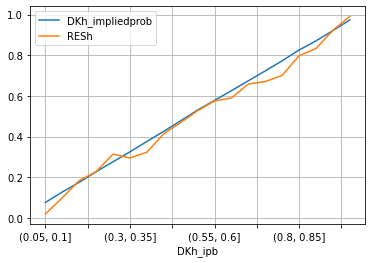

In [223]:
games_data.groupby("DKh_ipb").agg("mean")[["DKh_impliedprob", "RESh"]].plot(grid=True)

<AxesSubplot:xlabel='DKa_ipb'>

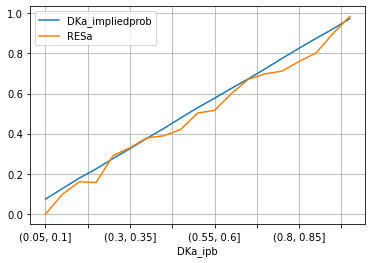

In [222]:
games_data.groupby("DKa_ipb").agg("mean")[["DKa_impliedprob", "RESa"]].plot(grid=True)

In [218]:
games_data

,date,home,away,SCOREh,SCOREa,DKh,DKa,DKh_payout,DKa_payout,DKh_cost,...,DKa_impliedprob,RESh,RESa,DKh_sig0,DKh_sig1,DKa_sig1,DKh_sig1_pnl,DKa_sig1_pnl,DKh_ipb,DKa_ipb
0,2018-01-01,Milwaukee,Toronto,127,131,NaN,NaN,NaN,NaN,100.0,...,NaN,0,1,0,0,0,NaN,NaN,NaN,NaN
1,2018-01-01,Orlando,Brooklyn,95,98,NaN,NaN,NaN,NaN,100.0,...,NaN,0,1,0,0,0,NaN,NaN,NaN,NaN
2,2018-01-01,L.A. Lakers,Minnesota,96,114,NaN,NaN,NaN,NaN,100.0,...,NaN,0,1,0,0,0,NaN,NaN,NaN,NaN
3,2018-01-01,Portland,Chicago,124,120,NaN,NaN,NaN,NaN,100.0,...,NaN,1,0,0,0,0,NaN,NaN,NaN,NaN
4,2018-01-02,Portland,Cleveland,110,127,NaN,NaN,NaN,NaN,100.0,...,NaN,0,1,0,0,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7024,2023-02-15,Dallas,Denver,109,118,185.0,-215.0,185.0,100.0,100.0,...,0.682540,0,1,0,0,1,-0.0,0.465116,"(0.35, 0.4]","(0.65, 0.7]"
7025,2023-02-15,New Orleans,L.A. Lakers,102,120,160.0,-190.0,160.0,100.0,100.0,...,0.655172,0,1,0,0,1,-0.0,0.526316,"(0.35, 0.4]","(0.65, 0.7]"
7026,2023-02-16,Milwaukee,Chicago,112,100,-330.0,275.0,100.0,275.0,330.0,...,0.266667,1,0,1,0,0,0.0,-0.000000,"(0.75, 0.8]","(0.25, 0.3]"
7027,2023-02-16,Washington,Minnesota,114,106,145.0,-170.0,145.0,100.0,100.0,...,0.629630,1,0,0,0,1,0.0,-1.000000,"(0.4, 0.45]","(0.6, 0.65]"


In [219]:
games_data["DKh_sig1"].sum()

204